In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
%matplotlib inline
sns.set_style('darkgrid')

# <a id='0'>Content</a>

- <a href='#1'>About the dataset</a>  
- <a href='#2'>What is "Multivariate"</a>
- <a href='#3'>Pair Plot</a>
 - <a href='#30'>Simple Scatter Plot</a>   
   - <a href='#300'>Scatter Plot with regression line</a>
   - <a href='#301'>Faceted groups</a>
 - <a href='#31'>Basic Pair Plot</a>   
 - <a href='#32'>Category Wise Pair Plot</a>   
 - <a href='#33'>Countor lines</a>
- <a href='#4'>Correlations</a>
 - <a href='#41'>Diverging Palette Red</a>
 - <a href='#42'>Diverging Palette Blue with upper triangle Mask</a>
 - <a href='#43'>Plasma Palette with upper triangle Mask</a>
- <a href='#5'>Joint Plots</a>
- <a href='#6'>Parallel Plots</a>  
- <a href='#7'>References</a>

## <a id='1'> About the dataset </a>

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). [Using the ADAP learning algorithm to forecast the onset of diabetes mellitus](http://rexa.info/paper/04587c10a7c92baa01948f71f2513d5928fe8e81). In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## <a id='2'>What is "Multivariate"</a>

Multivariate data analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables. It is an expansion of bivariate data analysis, which considers only two variables in its models. As multivariate models consider more variables, they can examine more complex phenomena and find data patterns that more accurately represent the real world.

In [7]:
df = pd.read_csv('../Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <a id='3'>Pair Plot</a>

### <a id='30'>Basic ScatterPlot</a>

 - Rough idea about the relation between variables through the scatter plot, need correlation matrix for better understanding

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

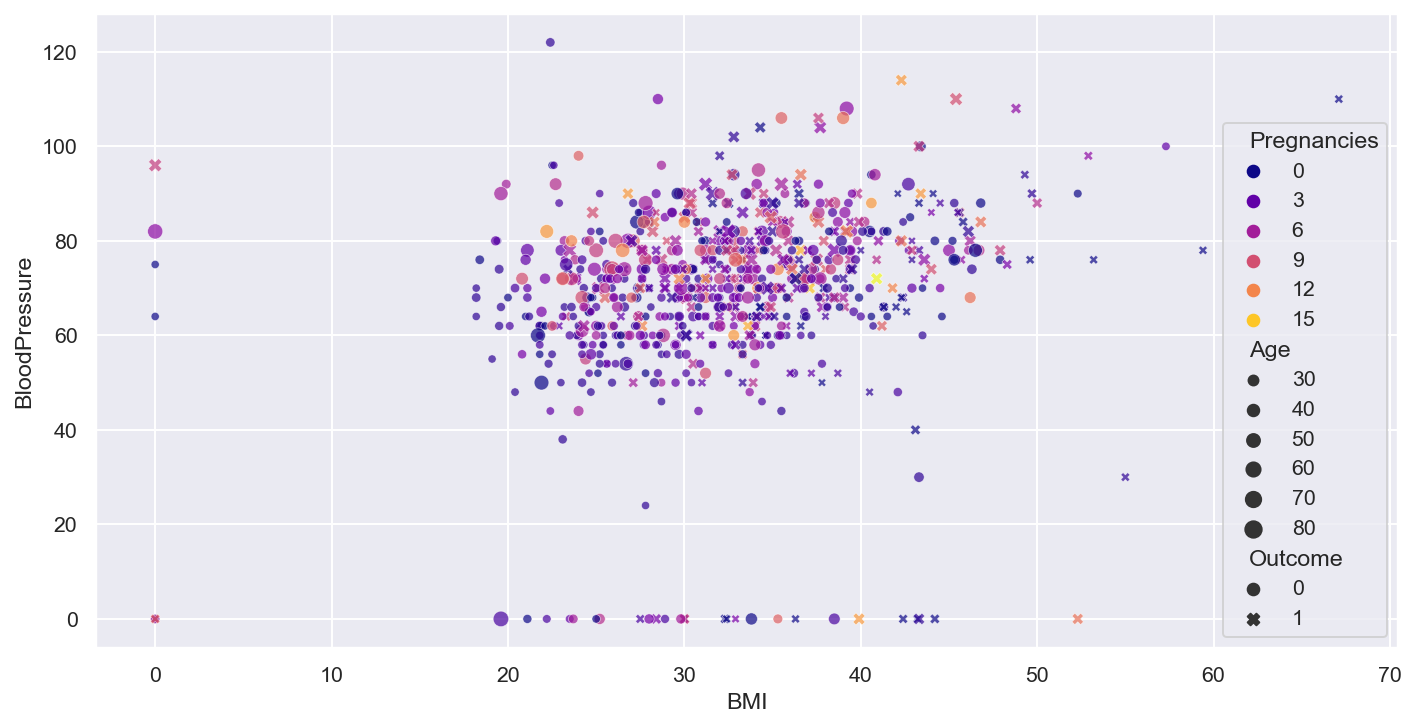

In [104]:
plt.figure(figsize=(12,6), dpi=140)
num_col1 = 'BMI'
num_col2 = 'BloodPressure'
target= 'Outcome'
cat_num_col1='Pregnancies'
cat_num_col2 ='Age'

sns.scatterplot(x=num_col1, y=num_col2, data=df,
                style=target, hue=cat_num_col1, 
                size=cat_num_col2, alpha=0.7, palette = 'plasma',
)#,sizes=(20,100), hue_norm=(0,15))

### <a id='300'>With regression Line</a>

 - Rough idea about the relation between variables through the scatter plot, need correlation matrix for better understanding

<Figure size 1680x840 with 0 Axes>

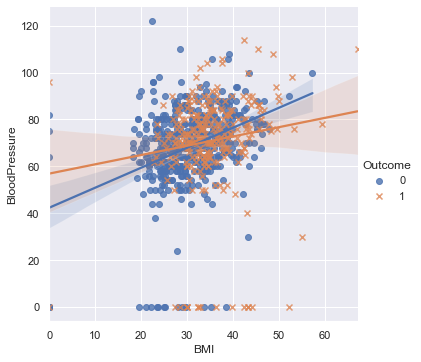

In [109]:
plt.figure(figsize=(12,6), dpi=140)
num_col1 = 'BMI'
num_col2 = 'BloodPressure'
target= 'Outcome'
cat_num_col1='Pregnancies'
cat_num_col2 ='Age'

sns.lmplot(x=num_col1, y=num_col2, markers=['o','x'], hue=target, data=df, fit_reg=True)

### <a id='301'>Faceted groups</a>

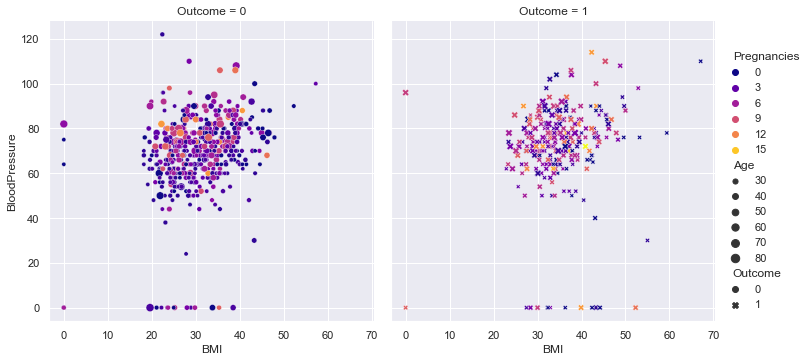

In [107]:
num_col1 = 'BMI'
num_col2 = 'BloodPressure'
target= 'Outcome'
cat_num_col1='Pregnancies'
cat_num_col2 ='Age'

sns.relplot(
    data=df, x=num_col1, y=num_col2,
    col=target, hue=cat_num_col1, size=cat_num_col2, style = target,palette = 'plasma',
    kind="scatter"#,aspect=0.5, height=12
)


### <a id='31'>Basic Pair Plot</a>

 - Observe the distribution for skewness and outliers in the diagonal of the pair plot.
 - Rough idea about the relation between variables through the scatter plot, need correlation matrix for better understanding

<Figure size 840x560 with 0 Axes>

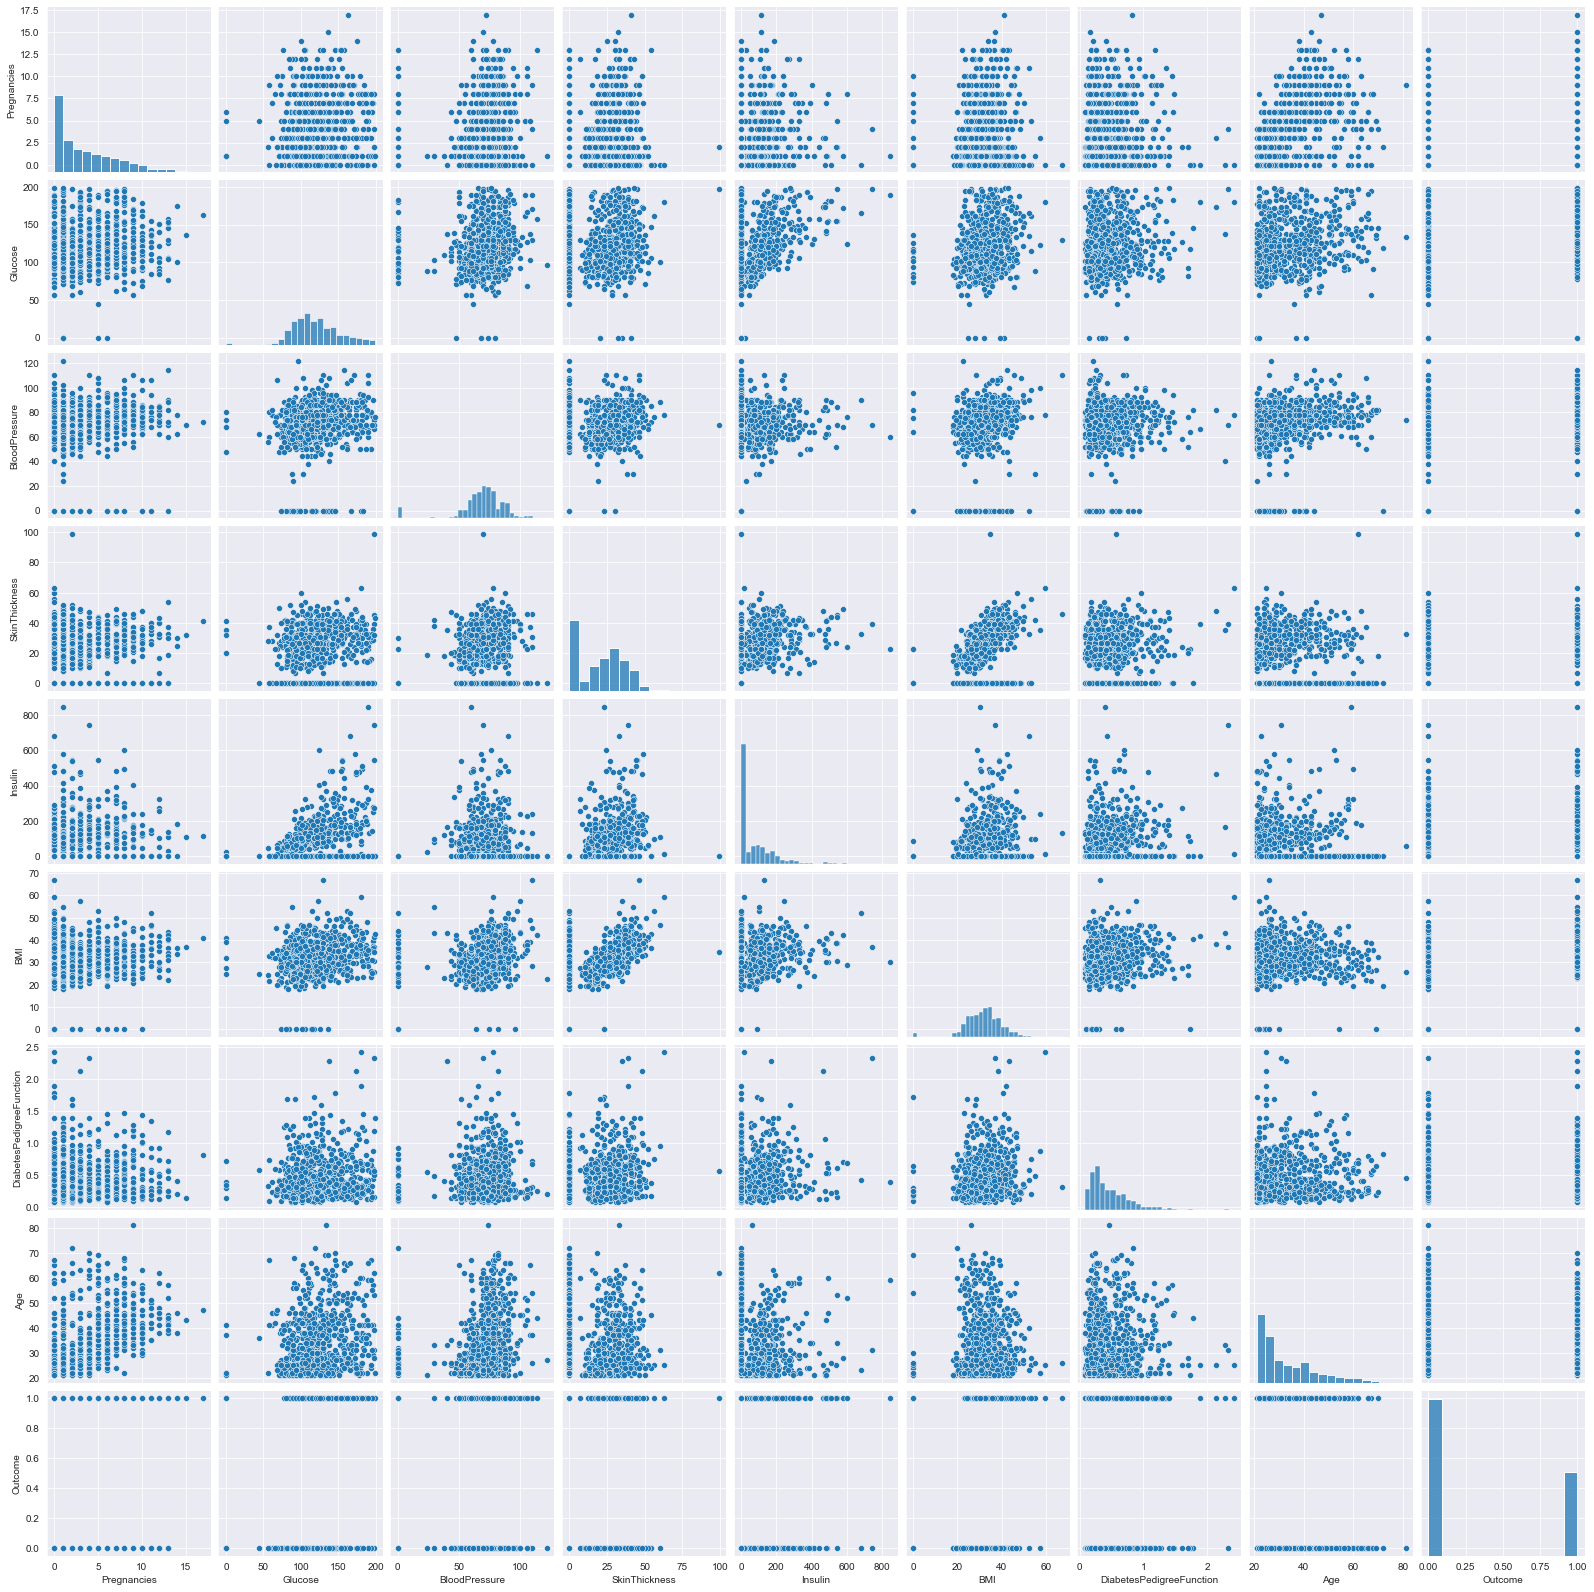

In [11]:
plt.figure(dpi=140)
sns.pairplot(df)
plt.show()

### <a id='32'>Category Wise Pair Plot</a>

 - Observe the various scatter plots for linear seperability to hypothesize linear/non-linear model
 - the density curve on the diagonal point normality of the variables, in this example skewness exist, can be due to outliers, (can try to remove them and re-plot)

<Figure size 840x560 with 0 Axes>

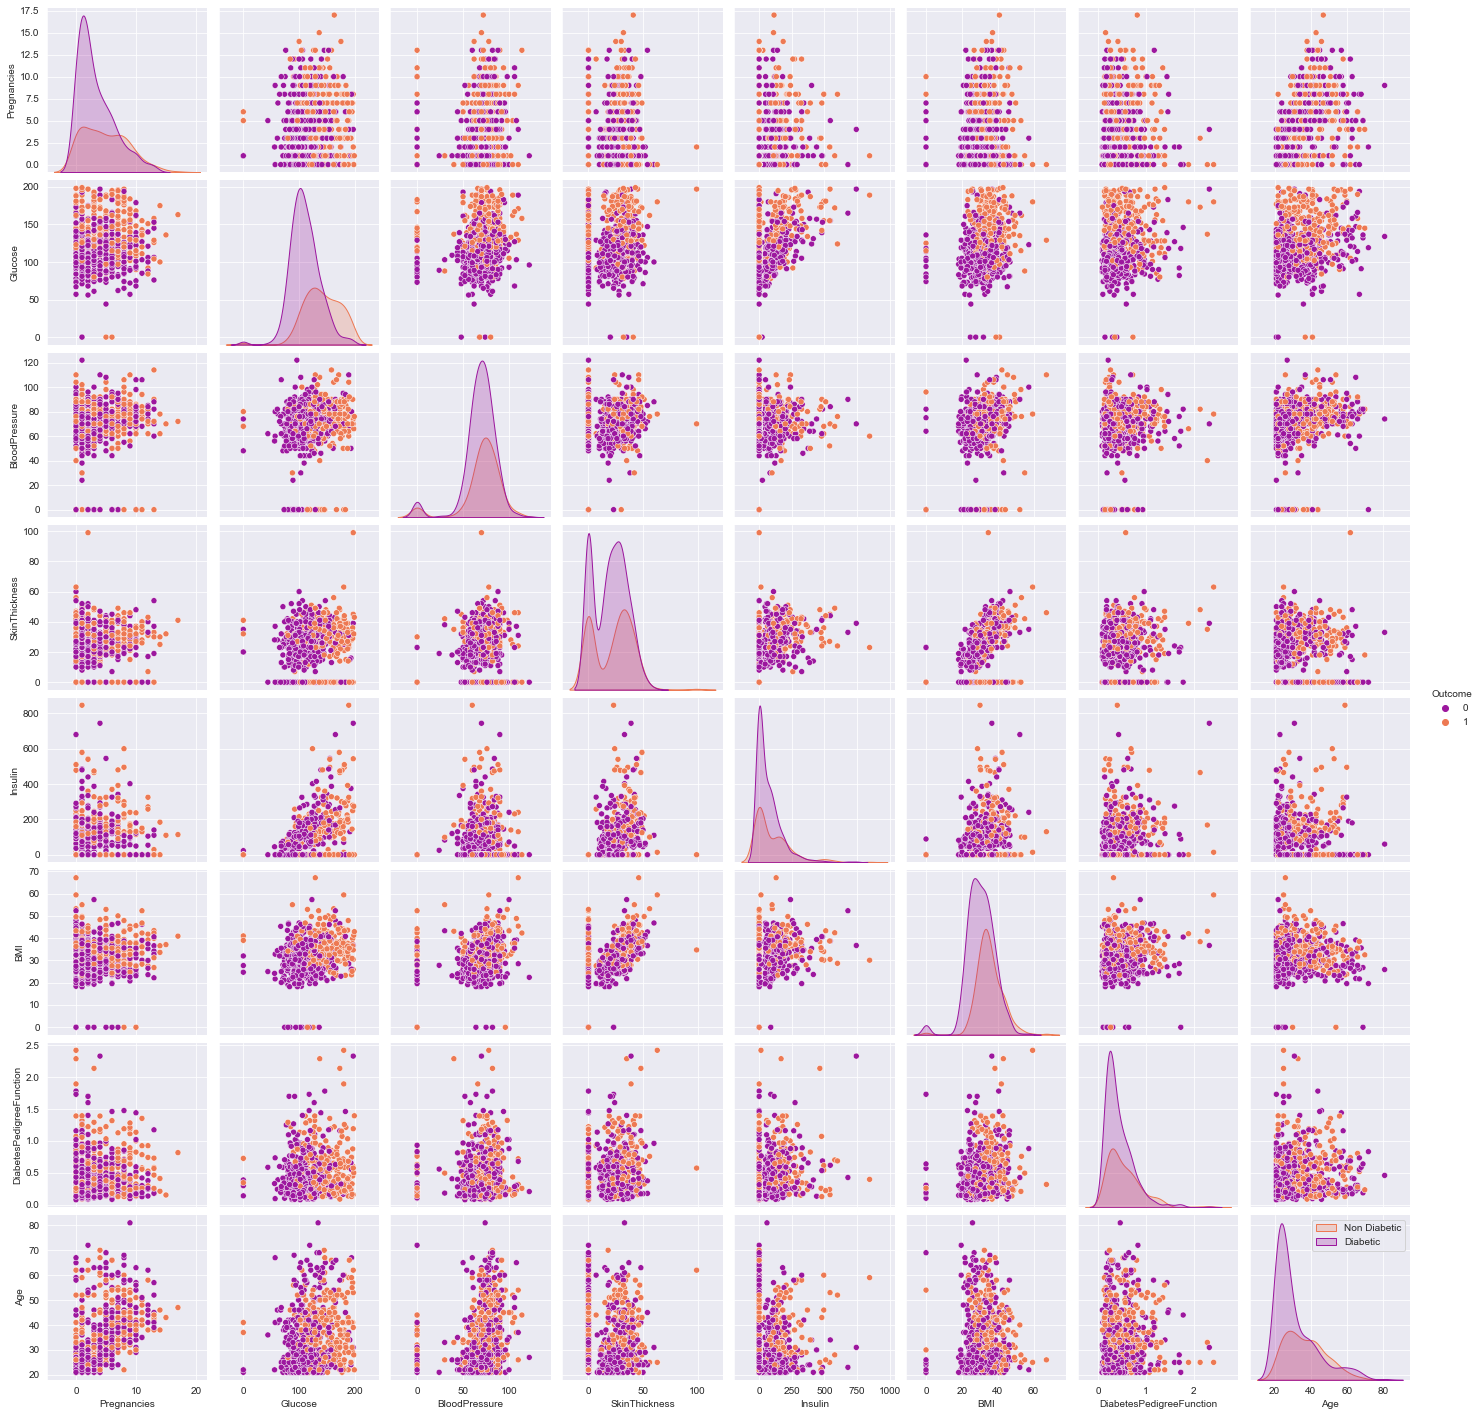

In [15]:
plt.figure(dpi = 140)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

### <a id='33'>Contour lines Plot</a>

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

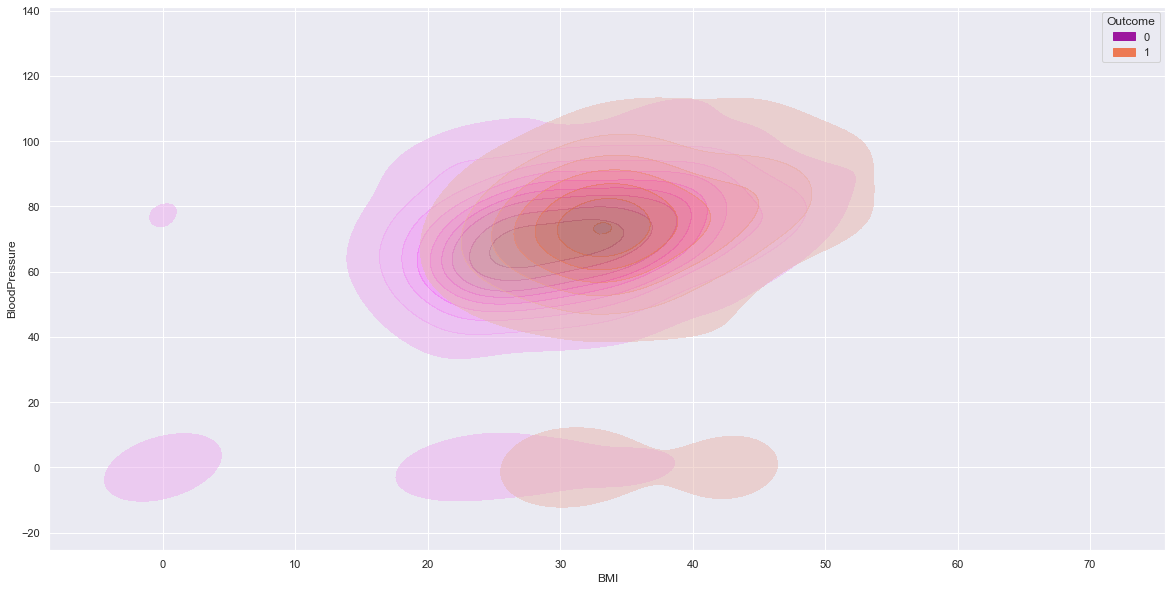

In [125]:
sns.kdeplot(data=df, x=num_col1, y=num_col2, hue=target,fill=True,alpha=0.5,palette = 'plasma')

## <a id='4'>Correlations</a>

 - All correlations less than or around 0.5. Therefore, Not very strong linear correlations.

### <a id='41'>Diverging Palette Red</a>

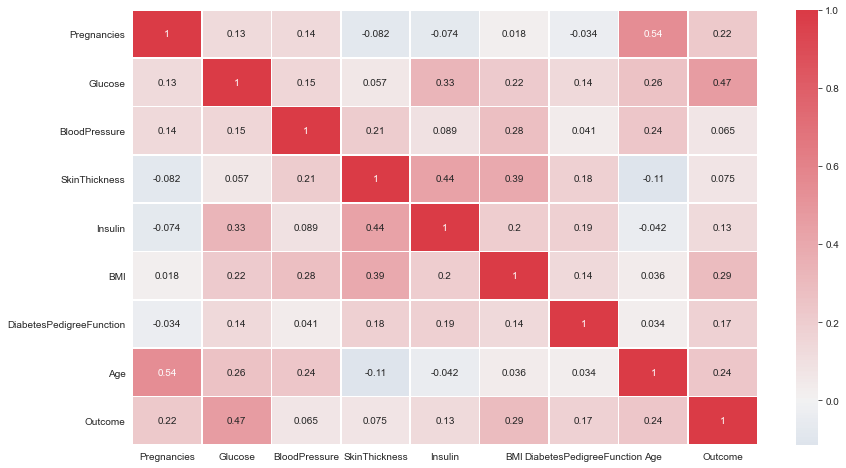

In [23]:
plt.figure(figsize= (14,8))
# cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap = sns.diverging_palette(250, 10, as_cmap=True)
ax = sns.heatmap(df.corr(),center = 0,annot= True,linewidth=0.5,cmap= cmap)

### <a id='42'>Diverging Palette Blue with upper triangle Mask</a>

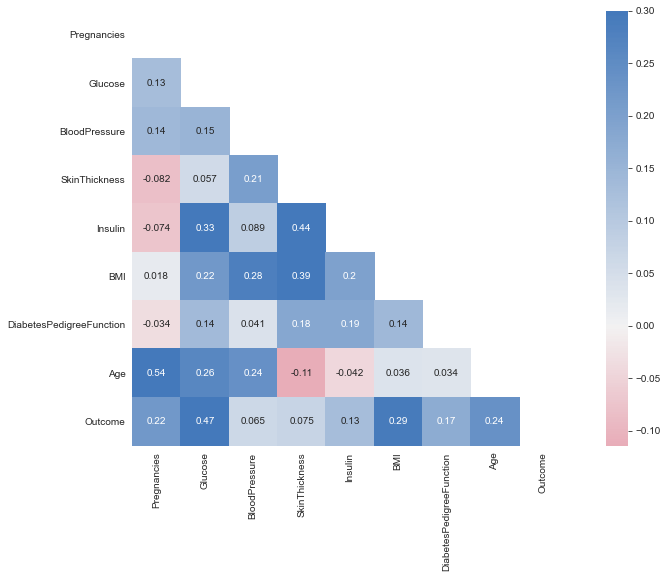

In [29]:
corr = df.corr()
plt.figure(figsize=(14,8))
cmap=sns.diverging_palette(5, 250, as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap=cmap,center = 0,annot=True)

### <a id='43'>Plasma Palette with upper triangle mask</a>

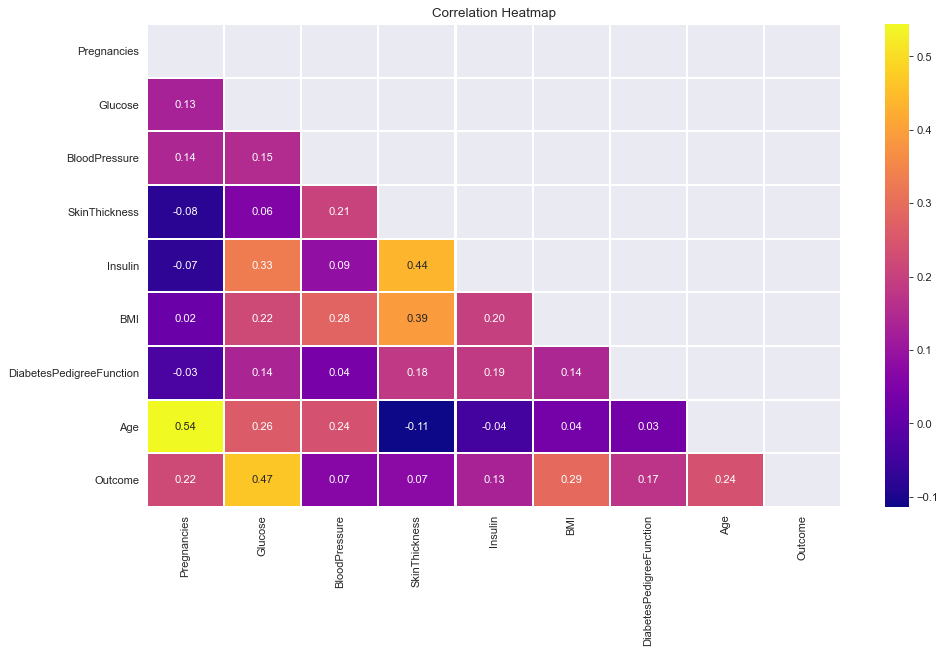

In [24]:
plt.figure(dpi = 80,figsize= (14,8))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

## <a id='5'>Joint Plots</a>

 - Dig deeper for each variable and its association with other variables.
 - in this example,
   - <font color='blue'>Glucose shows positive weak linear association with other variable in given dataset.</font> That means On increasing Glucose level in patients, Other variables will also increase. Weak linear association is good because we can escape out from Multicollinearity effect in Predective Modelling.

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

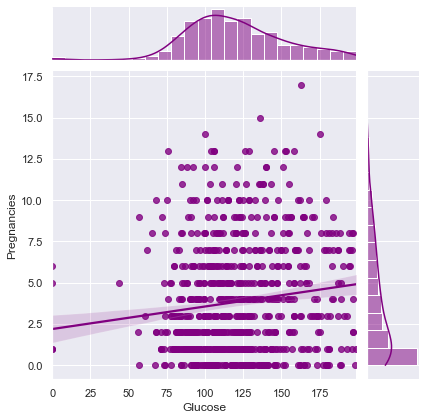

Correlation between Glucose and BloodPressure ==>  0.15258958656866448


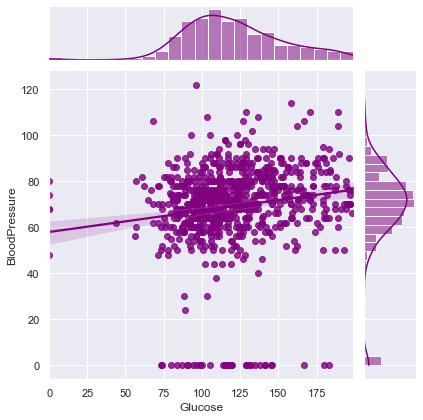

Correlation between Glucose and SkinThickness ==>  0.057327890738176825


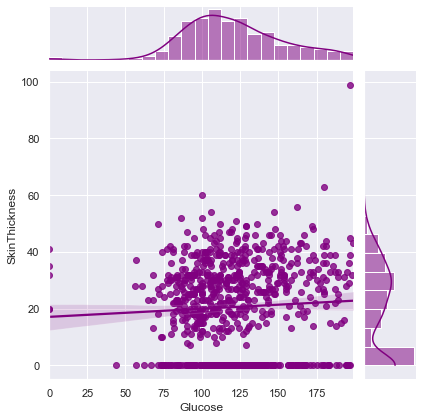

Correlation between Glucose and Insulin ==>  0.3313571099202081


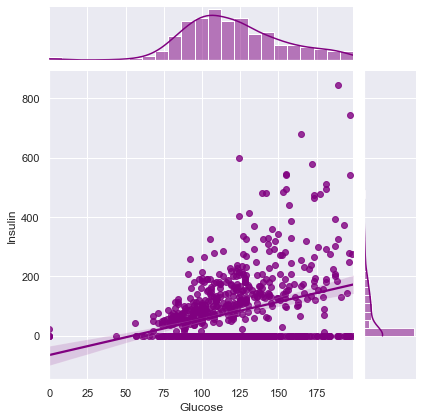

Correlation between Glucose and BMI ==>  0.22107106945898305


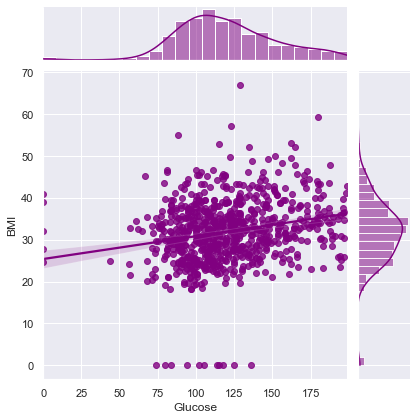

Correlation between Glucose and DiabetesPedigreeFunction ==>  0.1373372998283708


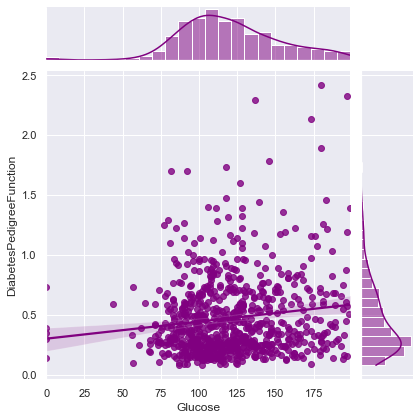

Correlation between Glucose and Age ==>  0.26351431982433376


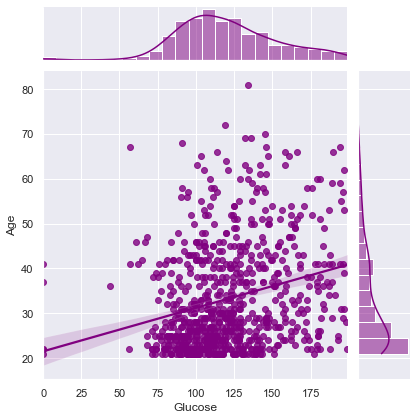

In [126]:
plt.figure(dpi = 100, figsize = (5,4))
comparsion_variable = 'Glucose'
target = 'Outcome'

print("Joint plot of {} with Other Variables ==> \n".format(comparsion_variable))
for i in  df.columns:
    if i != comparsion_variable and i != target:
        print(f"Correlation between {comparsion_variable} and {i} ==> ",df.corr().loc[comparsion_variable][i])
        sns.jointplot(x=comparsion_variable,y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()

## <a id='6'>Parallel Plots</a>

<AxesSubplot:>

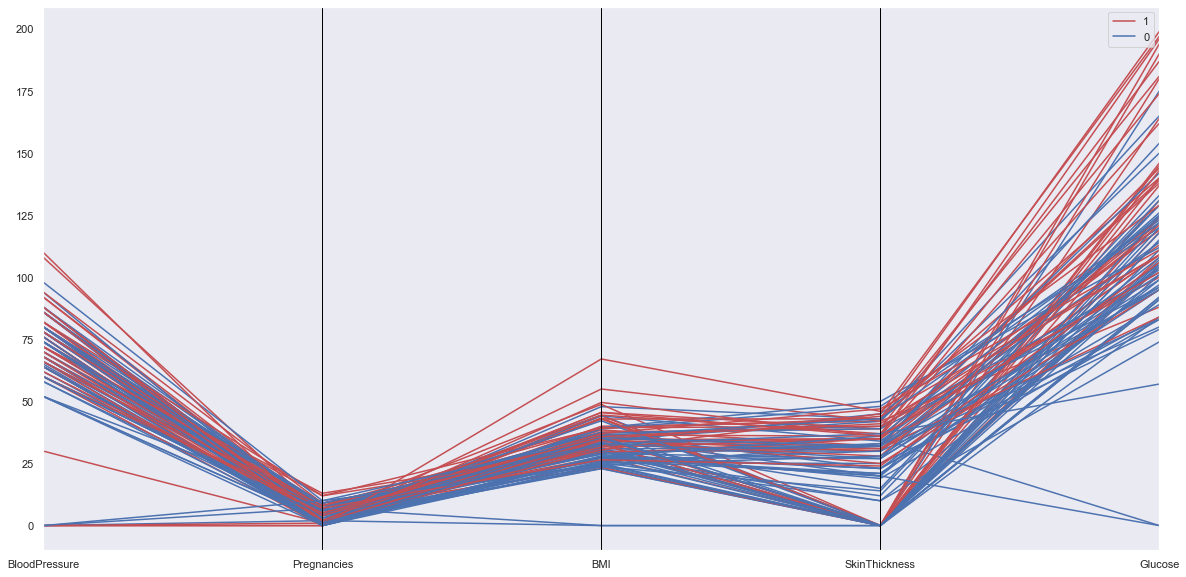

In [141]:
from pandas.plotting import parallel_coordinates

numeric_cols = ['BloodPressure','Pregnancies','BMI','SkinThickness','Glucose',target]

tdf = df.sample(100)

parallel_coordinates(tdf[numeric_cols], target, color = ['r','b'])

### <a id='7'>Refrences</a>
 - https://www.kaggle.com/ravichaubey1506/multivariate-statistical-analysis-on-diabetes/notebook
 - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
 - https://www.kaggle.com/princeashburton/multivariate-plotting